# Vizualizacija podatkov

Prostor za uvoz knjižnic :)

In [1]:
import random
from itertools import product

import pandas as pd
import plotnine as p9

Dani so naslednji meseci in kategorije izdelkov v spletni trgovini:

In [2]:
meseci = ["Januar", "Februar", "Marec", "April", "Maj", "Junij", "Julij"]
kategorije = ["Elektronika", "Oblačila", "Hrana", "Športna oprema"]

Za vajo sestavi podatkovno tabelo `trgovina`, ki ima stolpce:

* mesec
* kategorija
* prihodek - naključno (celo) število med 10000 in 25000, ki označuje prihodek v danem mesecu iz naslova dane kategorije
* kolicina_prodanih: število prodanih izdelkov v kategoriji - naključno (celo) število med 50 in 200
* zadovoljstvo_strank - naključno celo število med 1 in 5 (meji vključeni)

Posamezni pari `(mesec, kategorija)` naj se ne ponavljajo (namig: pomagaj si s funkcijo `product` iz paketa `itertools`).

Tabela naj ima 25 vrstic.

In [3]:
n = 25

# Generiranje podatkov
vse_kombinacije = list(product(meseci, kategorije))
izbrane_kombinacije = random.sample(vse_kombinacije, k=n)
podatki = {
    "mesec": [mesec for mesec, _ in izbrane_kombinacije],
    "kategorija": [kategorija for _, kategorija in izbrane_kombinacije],
    "prihodek": [random.randint(10000, 25000) for _ in range(n)],
    "kolicina_prodanih": [random.randint(50, 200) for _ in range(n)],
    "zadovoljstvo_strank": [random.randint(1, 5) for _ in range(n)]
}

trgovina = pd.DataFrame(podatki)

# Izpišemo tabelo
print(trgovina)

      mesec      kategorija  prihodek  kolicina_prodanih  zadovoljstvo_strank
0     Junij     Elektronika     13973                113                    2
1     Julij  Športna oprema     20895                164                    3
2    Januar  Športna oprema     22385                 82                    4
3     Marec  Športna oprema     12356                 65                    5
4   Februar           Hrana     19127                156                    4
5     Julij     Elektronika     17709                 98                    1
6     Julij        Oblačila     17224                 62                    5
7    Januar     Elektronika     12313                181                    1
8     April  Športna oprema     18842                 62                    1
9     Junij        Oblačila     24884                 83                    1
10    Julij           Hrana     12555                108                    3
11   Januar           Hrana     15394                157        

Sestavi kodo, ki nariše sledeče diagrame. Grafom nastavi smiselne naslove ter imena in zaloge vrednosti osi. Po potrebi nastavi podatkovne tipe stolpcev.

In [4]:
trgovina.mesec = trgovina.mesec.astype(pd.CategoricalDtype(meseci, ordered=True))

In [5]:
trgovina.mesec.cat.categories

Index(['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij'], dtype='object')

Nariši razsevni diagram, ki prikazuje prihodek v odvisnosti od števila prodanih izdelkov.

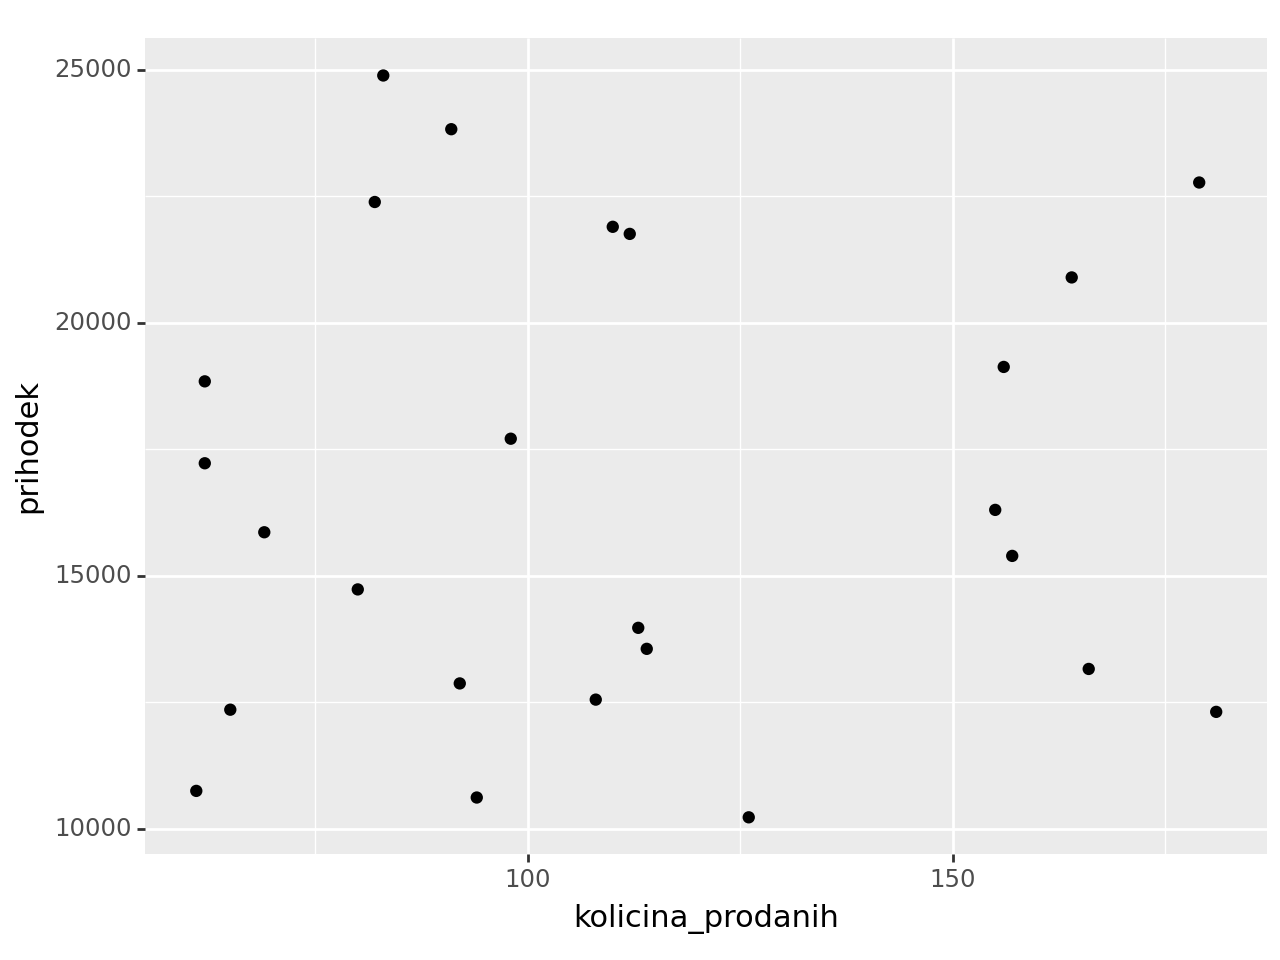

<Figure Size: (640 x 480)>

In [6]:
p9.ggplot(data=trgovina) + \
p9.aes(
    x="kolicina_prodanih",
    y='prihodek'
) + \
p9.geom_point()

Kodo, ki je narisala zgornji graf dopolni, da bodo oblike odvisne od kategorije, barva pa od zadovoljstva strank.

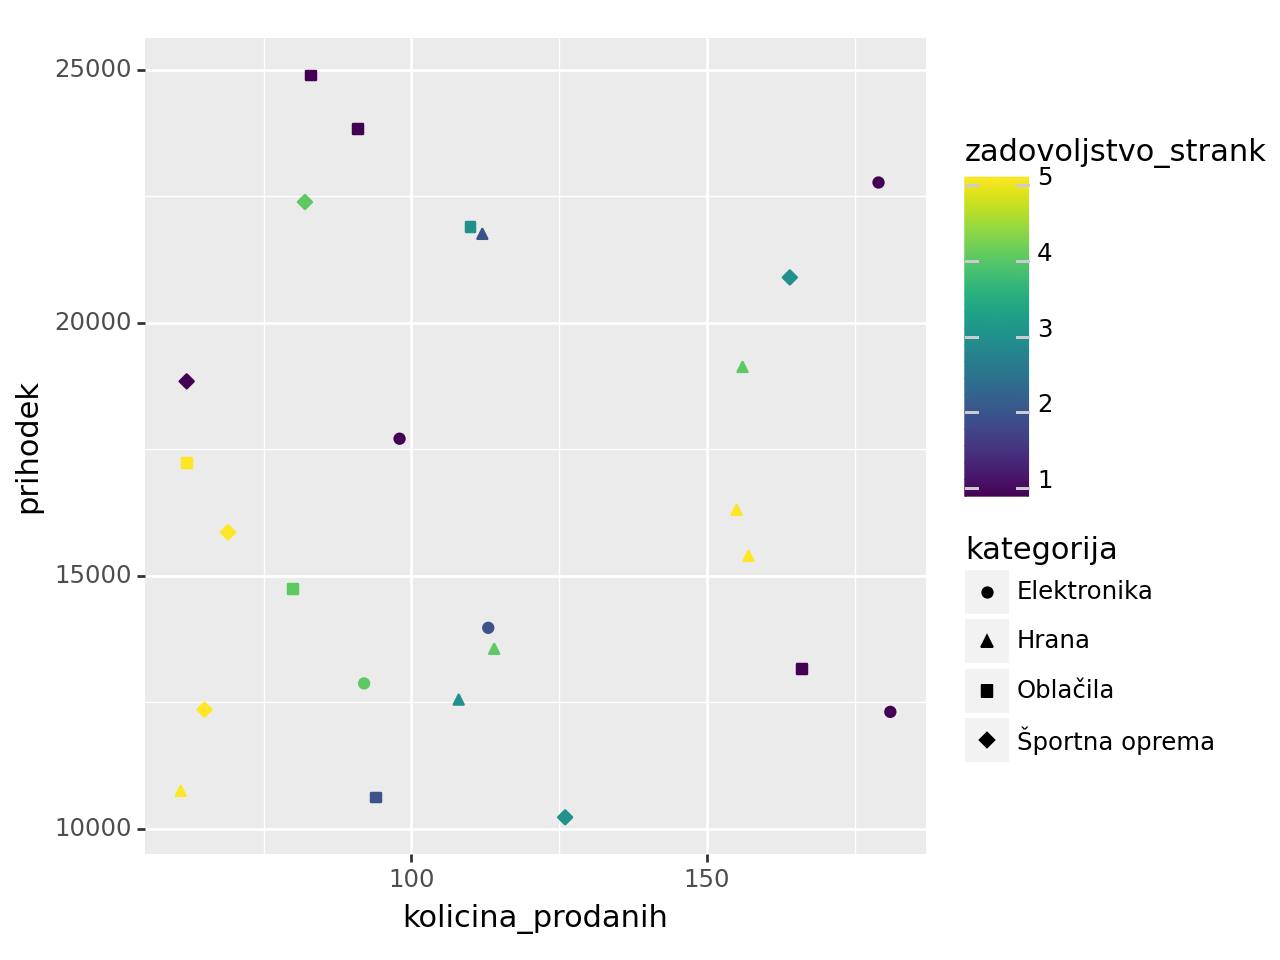

<Figure Size: (640 x 480)>

In [7]:
p9.ggplot(data=trgovina) + \
p9.aes(
    x="kolicina_prodanih",
    y='prihodek',
    color="zadovoljstvo_strank",
    shape="kategorija"
) + \
p9.geom_point() 

Nariši diagram prihodkov po mesecih (angl. line plot). Točke za posamezne kategorije naj bodo med seboj povezane s črto. Vsaka kategorija naj bo pobarvana s svojo barvo.

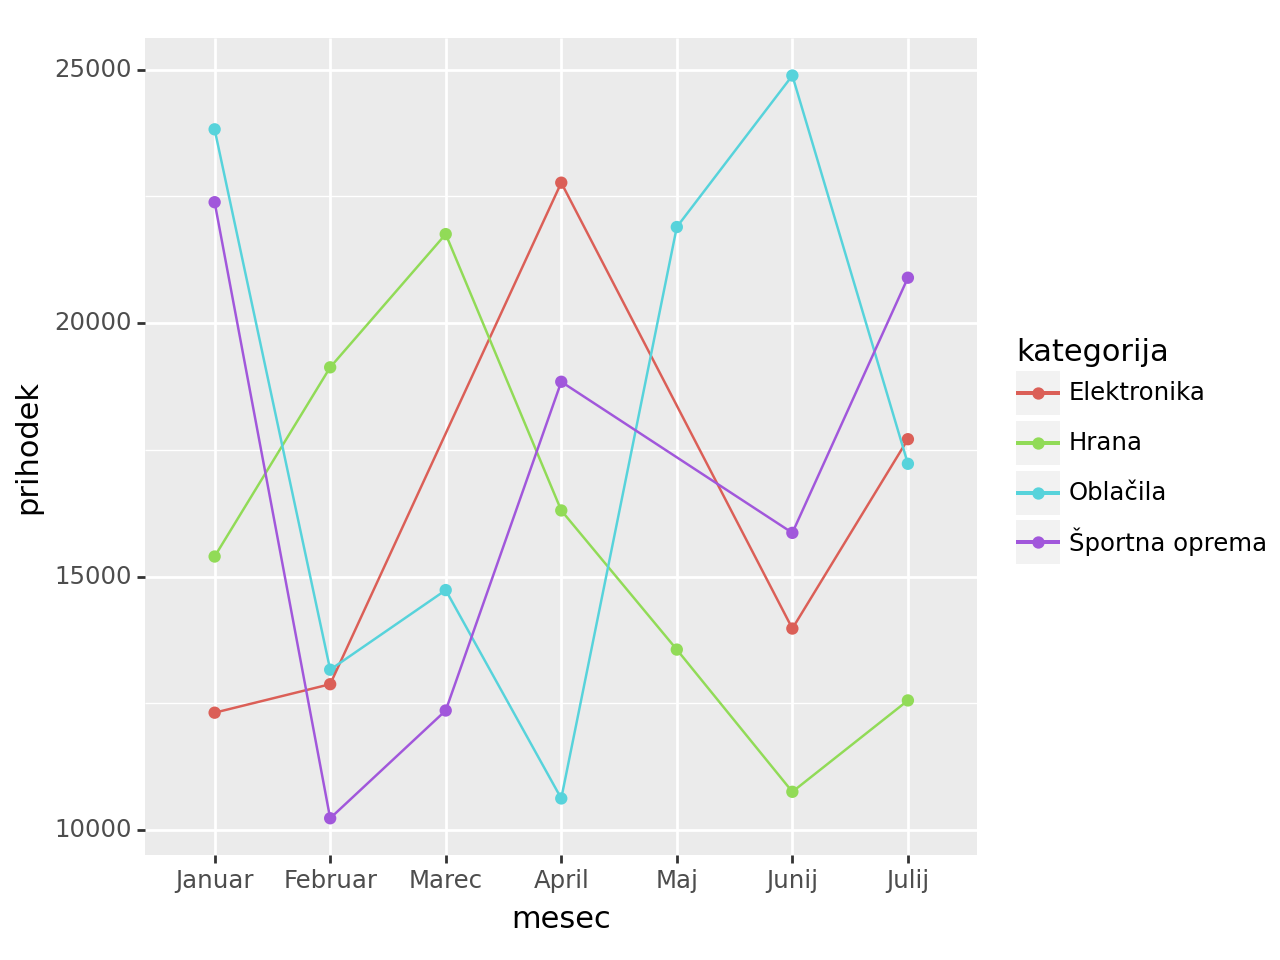

<Figure Size: (640 x 480)>

In [8]:
p9.ggplot(data=trgovina) + \
p9.aes(
    x="mesec",
    y='prihodek',
    color="kategorija",
    group='kategorija'
) + \
p9.geom_point() + \
p9.geom_line()

Nariši stolpčni diagram skupnih prihodkov po mesecih. Vsak mesec naj bo pobarvan s svojo barvo.

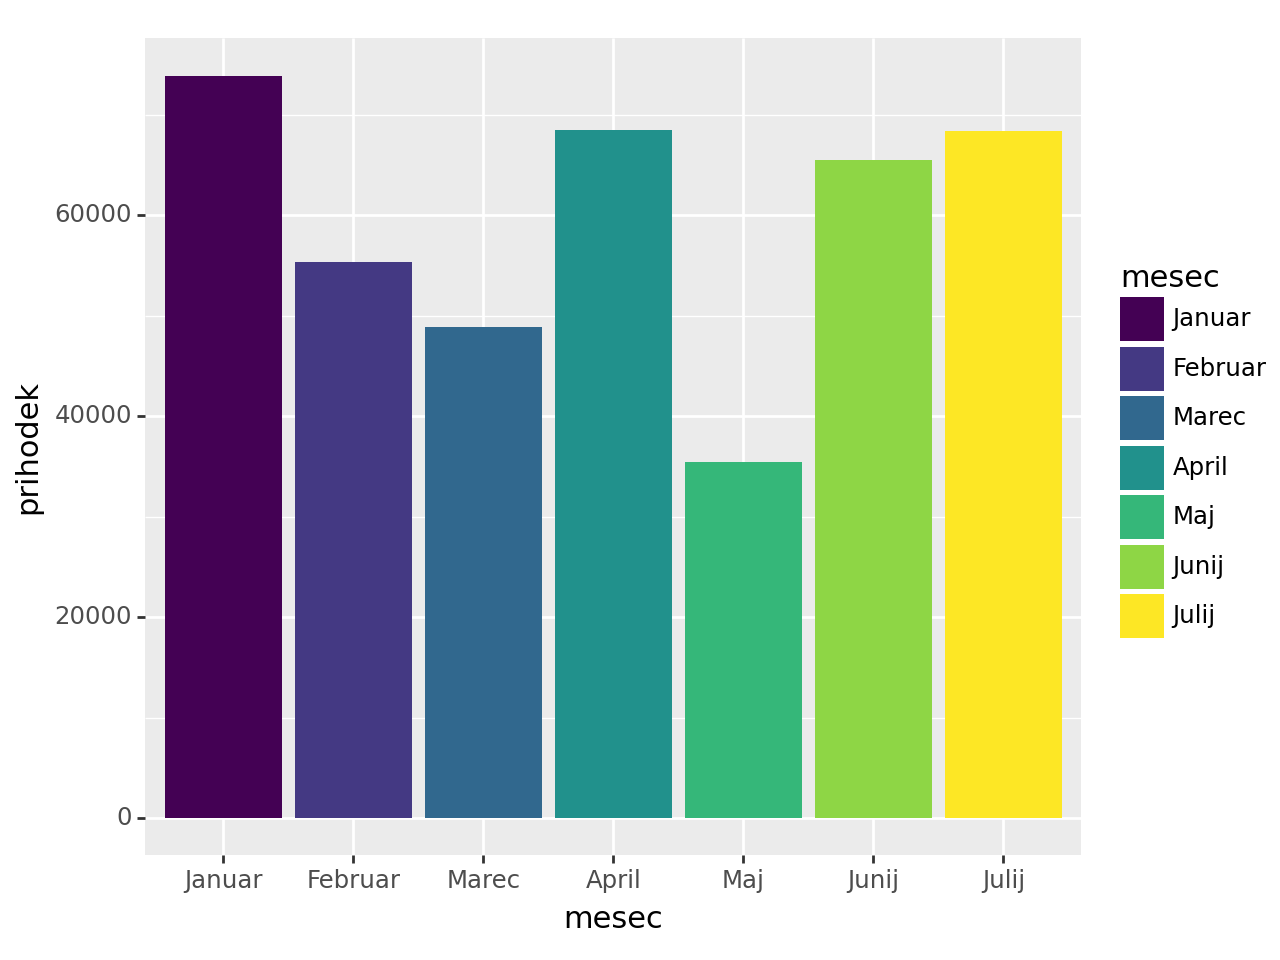

<Figure Size: (640 x 480)>

In [9]:
p9.ggplot(data = trgovina) + \
p9.aes(
    x="mesec",
    y="prihodek",
    fill="mesec"
) + \
p9.geom_col()

Nariši zloženi stolpčni diagram prihodkov po mesecih glede na kategorijo.

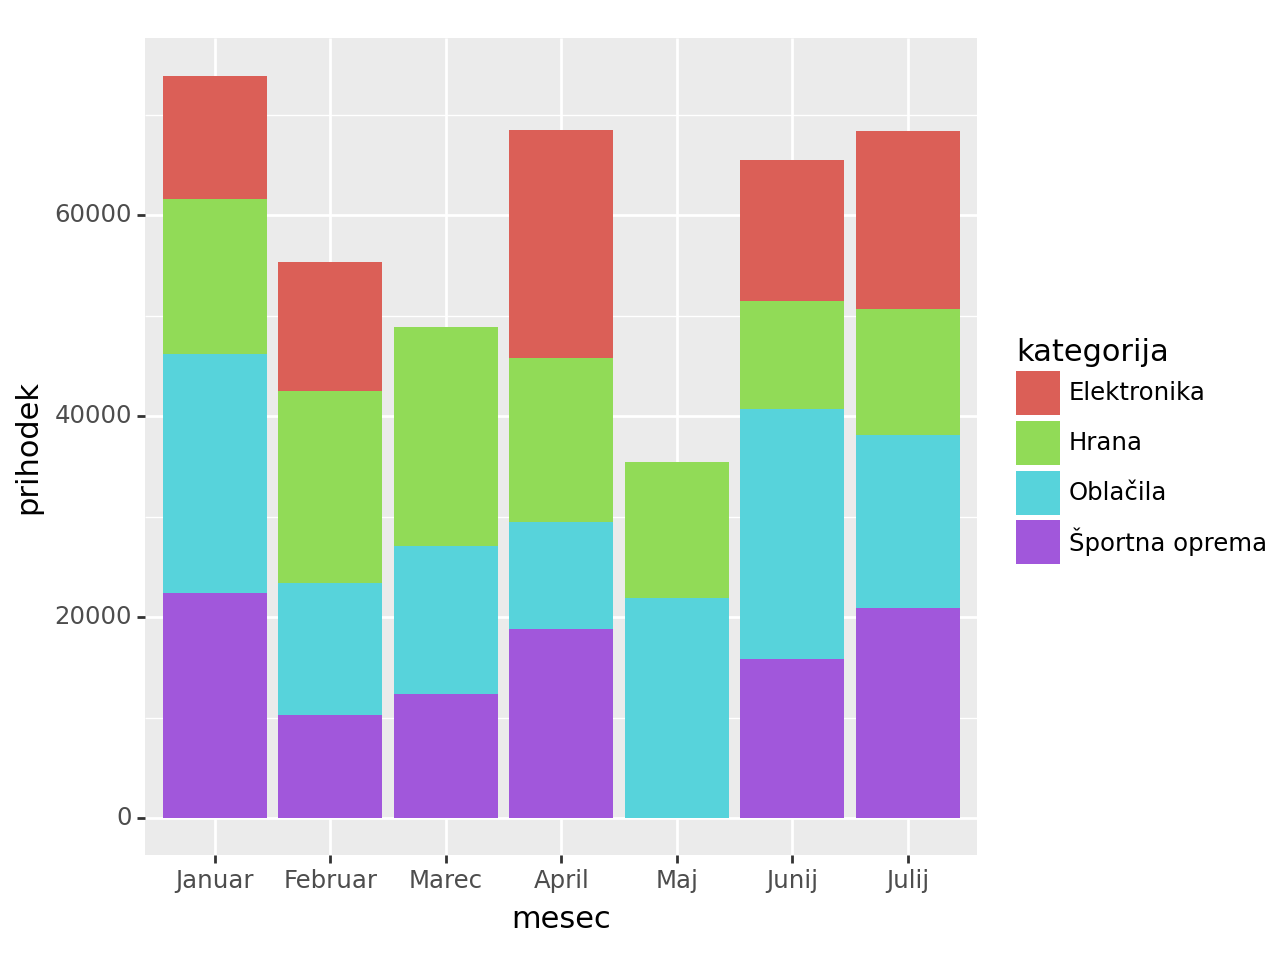

<Figure Size: (640 x 480)>

In [10]:
p9.ggplot(data = trgovina) + \
p9.aes(
    x="mesec",
    y="prihodek",
    fill="kategorija"
) + \
p9.geom_col()

Nariši še stolpčni diagram, podoben zgornjemo, le da so sedaj stolpci eden poleg drugega:

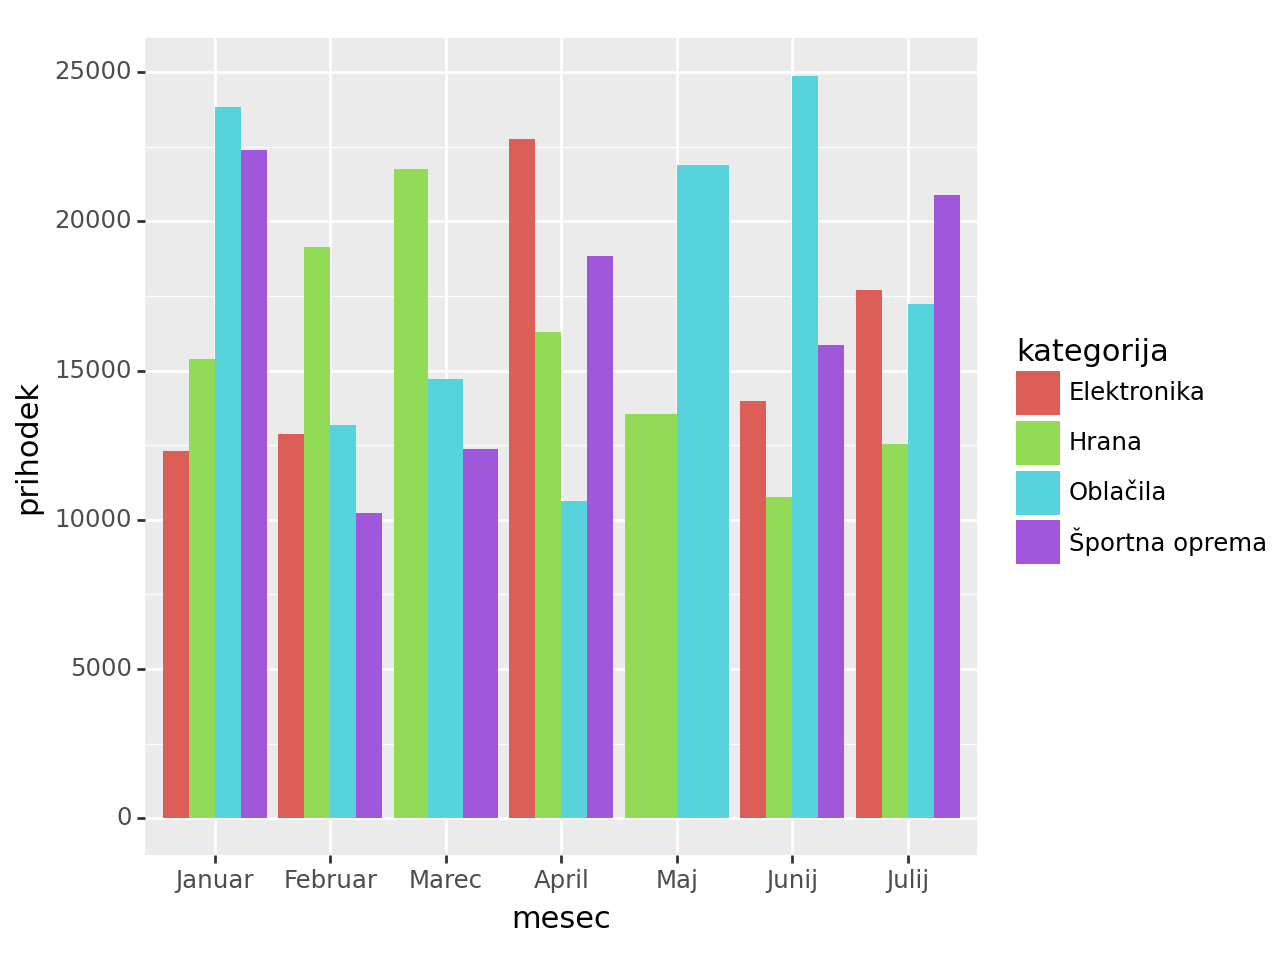

<Figure Size: (640 x 480)>

In [16]:
p9.ggplot(data = trgovina) + \
p9.aes(
    x="mesec",
    y="prihodek",
    fill="kategorija"
) + \
p9.geom_col(position = p9.position_dodge)

Nariši še diagram škatel, ki prikazuje porazdelitev zadovoljstva strank po mesecih. 

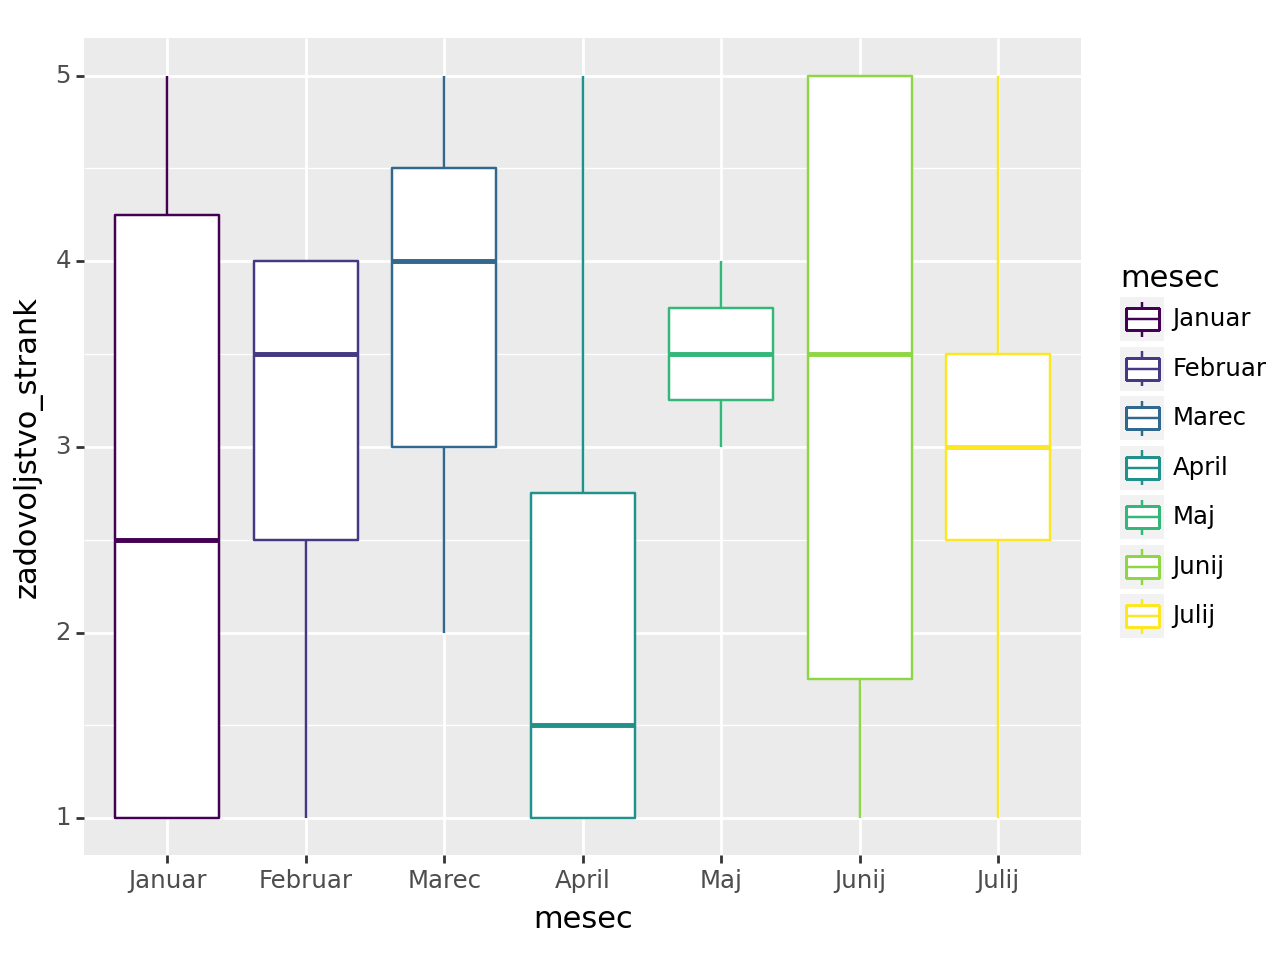

<Figure Size: (640 x 480)>

In [15]:
p9.ggplot(data = trgovina) + \
p9.aes(
    x="mesec",
    y="zadovoljstvo_strank",
    group="mesec",
    color="mesec"
) + \
p9.geom_boxplot()

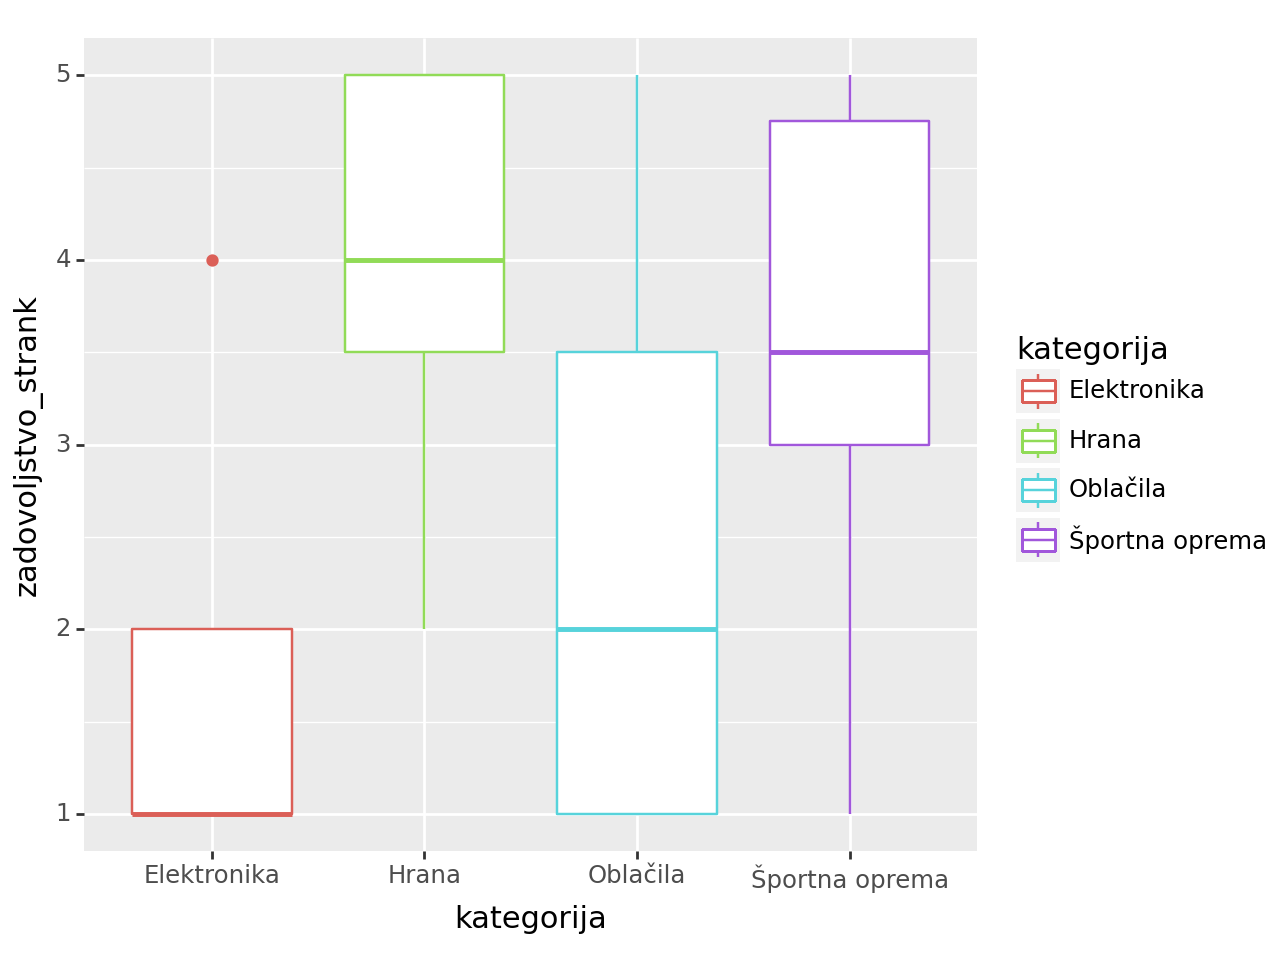

<Figure Size: (640 x 480)>

In [18]:
p9.ggplot(data = trgovina) + \
p9.aes(
    x="kategorija",
    y="zadovoljstvo_strank",
    group="kategorija",
    color="kategorija"
) + \
p9.geom_boxplot()

Prikaži različna razmerja listov za podatke iz zbirke iris.